# Data Enrichment

This notebook focuses on comprehensive **data enrichment** of the extracted articles from PubMed.

In [1]:
# import re
import sys
# import ast
import pandas as pd

# and Functions
sys.path.append('../src')
from support_01 import *
from support_02 import *

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../data/articles_journals_df.csv')
df.shape

(200, 1)

##### Example of extracted data

'PMID- 37815691\nOWN - NLM\nSTAT- MEDLINE\nDCOM- 20231121\nLR  - 20231123\nIS  - 1995-8218 (Electronic)\nIS  - 1673-7067 (Print)\nIS  - 1995-8218 (Linking)\nVI  - 39\nIP  - 12\nDP  - 2023 Dec\nTI  - Propofol Brings on the Light for Depression Therapy.\nPG  - 1891-1894\nLID - 10.1007/s12264-023-01133-7 [doi]\nFAU - Yan, Yun\nAU  - Yan Y\nAUID- ORCID: 0000-0002-9993-4959\nAD  - Department of Anesthesiology, China-Japan Friendship Hospital, Chinese Academy of \n      Medical Sciences and Peking Union Medical College, Beijing, 100029, China.\nFAU - Ma, Hongli\nAU  - Ma H\nAUID- ORCID: 0000-0001-8925-1372\nAD  - Department of Anesthesiology, China-Japan Friendship Hospital, Chinese Academy of \n      Medical Sciences and Peking Union Medical College, Beijing, 100029, China.\nFAU - Zhao, Jing\nAU  - Zhao J\nAUID- ORCID: 0000-0002-4640-2609\nAD  - Department of Anesthesiology, China-Japan Friendship Hospital, Chinese Academy of \n      Medical Sciences and Peking Union Medical College, Beijing, 100029, China. \n      zhaojing1009@aliyun.com.\nLA  - eng\nPT  - Journal Article\nDEP - 20231010\nPL  - Singapore\nTA  - Neurosci Bull\nJT  - Neuroscience bulletin\nJID - 101256850\nRN  - YI7VU623SF (Propofol)\nSB  - IM\nMH  - *Propofol/therapeutic use\nMH  - Depression/drug therapy\nPMC - PMC10661581\nCOIS- The authors declare that there are no conflicts of interest.\nEDAT- 2023/10/10 12:43\nMHDA- 2023/11/21 06:43\nPMCR- 2024/12/01\nCRDT- 2023/10/10 11:11\nPHST- 2023/04/11 00:00 [received]\nPHST- 2023/08/22 00:00 [accepted]\nPHST- 2024/12/01 00:00 [pmc-release]\nPHST- 2023/11/21 06:43 [medline]\nPHST- 2023/10/10 12:43 [pubmed]\nPHST- 2023/10/10 11:11 [entrez]\nAID - 10.1007/s12264-023-01133-7 [pii]\nAID - 1133 [pii]\nAID - 10.1007/s12264-023-01133-7 [doi]\nPST - ppublish\nSO  - Neurosci Bull. 2023 Dec;39(12):1891-1894. doi: 10.1007/s12264-023-01133-7. Epub \n      2023 Oct 10.'

In [3]:
articles = df.copy()

In [4]:
articles = pd.concat([articles, articles['0'].apply(lambda x: pd.Series(extraer_informacion(x)))], axis = 1)
articles.drop('0', axis = 1, inplace = True)
articles.shape

(200, 36)

In [5]:
articles.head(2)

,PMID,OWN,STAT,DCOM,LR,IS,VI,IP,DP,Title,...,SB,MH,PMC,COIS,Received_Date,Accepted_Date,Reference,Dep,Place,Abstract
0,37815691,NLM,MEDLINE,20231121,20231123,"[1995-8218 (Electronic), 1673-7067 (Print), 19...",39,12,2023 Dec,Propofol Brings on the Light for Depression Th...,...,IM,"[*Propofol/therapeutic use, Depression/drug th...",PMC10661581,The authors declare that there are no conflict...,2023/04/11 00:00,2023/08/22 00:00,Neurosci Bull. 2023 Dec;39(12):1891-1894. doi:...,20231010,Singapore,NaN
1,37812301,NLM,MEDLINE,20231127,20231127,"[1995-8218 (Electronic), 1673-7067 (Print), 19...",39,12,2023 Dec,Alterations of Audiovisual Integration in Alzh...,...,IM,"[Animals, Humans, *Alzheimer Disease/pathology...",PMC10661680,The authors declare that they have no conflict...,2023/04/12 00:00,2023/06/22 00:00,Neurosci Bull. 2023 Dec;39(12):1859-1872. doi:...,20231009,Singapore,Audiovisual integration is a vital information...


In [6]:
articles.columns

Index(['PMID', 'OWN', 'STAT', 'DCOM', 'LR', 'IS', 'VI', 'IP', 'DP', 'Title',
       'Pages', 'DOI', 'Authors', 'First_Author', 'Last_Author',
       'First_Auth_ID', 'Last_Auth_ID', 'Auth_aff_list', 'First_Auth_aff',
       'Last_Auth_aff', 'Jr_abb', 'Journal', 'Lang', 'Pub_Type', 'JID', 'RN',
       'SB', 'MH', 'PMC', 'COIS', 'Received_Date', 'Accepted_Date',
       'Reference', 'Dep', 'Place', 'Abstract'],
      dtype='object')

___

### Data cleansing protocol for the DataFrame:

    01. remove empty space from column names and cells:
    remove_spaces_column_names(df);
    remove_spaces_columns(df);

    02. Find duplicates and remove them if needed:
    any_duplicate(df)
    specific_duplicates(df, col1, col2)
    drop_duplicates(df)

    03. Find NaN values and visualize them.
    nan(df) 
    view_nan(df) 

    04. Check the columns that are constant or present low variance:
    low_variance(df) 
    unique_values(df)
    constant_columns(df)

    * Evaluate if the constant or low variance columns are needed or can be droped:
    df.drop('column', axis = 1, inplace = True)

    05. Find cells containing special characters:
    find_special_chars(df, patron = r'[?¿*$%&]')

    06. export the clean table as csv:
    df.to_csv('../output_clean/df.csv', index = False)

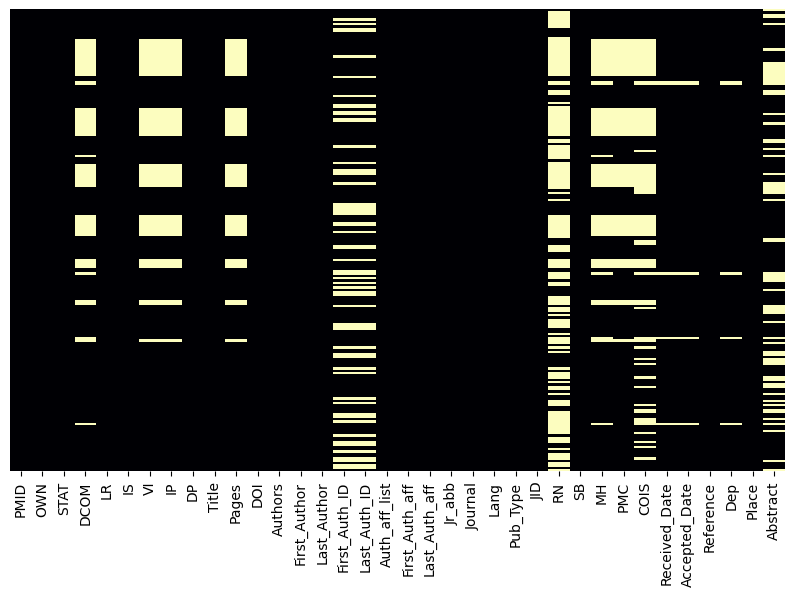

In [8]:
view_nan(articles) 

In [ ]:
error

In [ ]:
# There are NaN values in two columns: 
# volumnes and last_page.
# This is because the absence of protocol 
# form in the article source

articles['first_page'].value_counts()

In [ ]:
bad_results = {'article_source': [], 
               'index': []}

bad_res = articles['first_page'].str.split("\n").tolist()

for i, res in enumerate(bad_res):
    if len(res) > 1:
        bad_results['article_source'].append(res)
        bad_results['index'].append(i)
    else:
        continue

In [ ]:
bad_results_df = pd.DataFrame(bad_results)
bad_results_df.head(2)

In [ ]:
# I need to extract the information from 'first_page' 
# to feed 'volumne' and 'last_page'
# and maintain just the good value in 'first_page' 

for i in range(228):

    article_source = bad_results_df['article_source'][i][-1]

    # Using Regex to find the value in between ':' for volume
    match_vol = re.search(r"^(.*):(.*):(.*)$", article_source)

    # Si se encuentra un valor, lo agrega a la nueva columna
    if match_vol:
        bad_results_df.loc[i, 'volumes'] = match_vol.group(2)
        
        try:
            bad_results_df.loc[i, 'first_page'] = match_vol.group(3).split('-')[0]
        except:
            continue
            
        try:    
            bad_results_df.loc[i, 'last_page'] = match_vol.group(3).split('-')[1]
        except:
            continue

            break

In [ ]:
# Now, the extracteddd data from thee article source is categorized
bad_results_df.head()

In [ ]:
for j in range(len(bad_results_df)):
    for i in bad_results_df['index']:
        articles.loc[i, 'first_page'] = bad_results_df.loc[j, 'first_page']
        articles.loc[i, 'last_page'] = bad_results_df.loc[j, 'last_page']
        articles.loc[i, 'volume'] = bad_results_df.loc[j, 'volumes']

In [ ]:
articles.head(2)

In [ ]:
any_duplicate(articles)

In [ ]:
drop_duplicates(articles)
any_duplicate(articles)

In [ ]:
view_nan(articles) 

In [ ]:
articles = articles.loc[articles['DOI'].notnull()]

In [ ]:
articles['volume'].fillna('none', inplace = True)
articles['first_page'].fillna('none', inplace = True)
articles['last_page'].fillna('none', inplace = True)
articles['href'].fillna('none', inplace = True)
articles['json_href'].fillna('none', inplace = True)

In [ ]:
view_nan(articles) 

In [ ]:
low_variance(articles) 

In [ ]:
unique_values(articles)

In [ ]:
constant_columns(articles)

In [ ]:
find_special_chars(articles, patron = r'[?¿*$%&]')

In [ ]:
articles = articles.reset_index(drop = True)